Las preguntas de negocio requeridas son las siguientes:
1. Rentabilidad (ROI) por género o país.
○ ROI = revenue / budget
○ Analizar distribución y valores promedio por grupo.
2. Relación entre presupuesto y rating.
○ Correlaciones (Pearson, Spearman) y dispersogramas.
3. Evolución de la duración de películas en los últimos 50 años.
○ Promedio o mediana de runtime por década.
4. Directores con mejor rating promedio.
○ Filtrar por cantidad mínima de películas y analizar promedios.

Importamos las librerias necesarias con las que vamos a trabajar y comenzamos con el analisis exploratorio de los datasets.
Dicho analisis constará de:
1. Introduccion a los datasets *movies* y *credits*
2. Checkeo de relacion entre los mismos
3. Limpiado de la informacion para trabajar respecto a las preguntas de negocio.

In [12]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import json
import os

In [13]:
movies_df = pd.read_csv("/content/tmdb_5000_movies.csv")
credits_df = pd.read_csv("/content/tmdb_5000_credits.csv")

In [14]:
#Vemos rapidamente que informacion tiene el dataset credits.
credits_df.head(
)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
#Leemos el csv credits. Hay mucha informacion anidada, tenemos que depurar y conseguir la informacion sobre los directores desde la columna cast.
credits_df.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [16]:
#Vemos la forma del dataset.
credits_df.shape

(4803, 4)

Hacemos el mismo procedimiento con el dataset *movies*

In [17]:
movies_df.columns.tolist()

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [18]:
#Leemos el csv tmdb_5000_movies
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [19]:
movies_df.shape

(4803, 20)

In [20]:
#Revisamos si ambos datasets tienen la misma cantidad de columnas y si los id coinciden.
credits_df["movie_id"].isin(movies_df["id"]).all()

np.True_

Limpieza de datos en *movies*

In [21]:
#Hacemos una limpieza del dataset para remover a las peliculas que tienen valores 0, nulos o muy bajos en areas clave para el analisis como Budget o Revenue.
movies_preproc_df = movies_df[(movies_df['budget'] >50000) & (movies_df['revenue'] > 50000)].copy()
sorted_movies = movies_preproc_df.sort_values(by='budget')
sorted_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4738,60000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",http://www.pithemovie.com/,473,"[{""id"": 2157, ""name"": ""hacker""}, {""id"": 2303, ...",en,Pi,The debut film from Darren Aronofsky in which ...,27.788067,"[{""name"": ""Truth and Soul Pictures Inc"", ""id"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-07-10,3221152,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"There will be no order, only chaos",Pi,7.1,586
4496,60000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.blairwitch.com/,2667,"[{""id"": 616, ""name"": ""witch""}, {""id"": 3392, ""n...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,"[{""name"": ""Artisan Entertainment"", ""id"": 2188}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-07-14,248000000,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055
4752,65000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",http://tinyfurniture.com/,47607,"[{""id"": 1156, ""name"": ""sister sister relations...",en,Tiny Furniture,"After graduating from film school, Aura return...",2.380332,"[{""name"": ""Tiny Ponies"", ""id"": 65873}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-12,416498,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Aura would like you to know that she is having...,Tiny Furniture,5.6,59
4742,65000,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 35,...",NaN,9372,"[{""id"": 1706, ""name"": ""experiment""}, {""id"": 37...",en,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,10.400603,"[{""name"": ""Kathbur Pictures"", ""id"": 8735}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-01-17,28575078,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The first ever reality-based movie ... everyth...,Super Size Me,6.6,506
3159,85000,"[{""id"": 27, ""name"": ""Horror""}]",NaN,30497,"[{""id"": 1420, ""name"": ""gas station""}, {""id"": 1...",en,The Texas Chain Saw Massacre,Five friends visiting their grandfather's hous...,29.262427,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1974-10-01,30859000,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who will survive and what will be left of them?,The Texas Chain Saw Massacre,7.2,590


In [22]:
columns_to_keep = [
    'id',
    'title',
    "genres",
    'budget',
    'revenue',
    'popularity',
    'release_date',
    'runtime',
    'status',
    'vote_average',
    'vote_count'
]

movies_cleaned_df = movies_preproc_df[columns_to_keep].copy()
movies_cleaned_df = movies_cleaned_df.reset_index(drop=True)
movies_cleaned_df

,id,title,genres,budget,revenue,popularity,release_date,runtime,status,vote_average,vote_count
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,150.437577,2009-12-10,162.0,Released,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,139.082615,2007-05-19,169.0,Released,6.9,4500
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,107.376788,2015-10-26,148.0,Released,6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,112.312950,2012-07-16,165.0,Released,7.6,9106
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,43.926995,2012-03-07,132.0,Released,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...
3173,473,Pi,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",60000,3221152,27.788067,1998-07-10,84.0,Released,7.1,586
3174,9372,Super Size Me,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 35,...",65000,28575078,10.400603,2004-01-17,100.0,Released,6.6,506
3175,47607,Tiny Furniture,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",65000,416498,2.380332,2010-11-12,99.0,Released,5.6,59
3176,242095,The Signal,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",4000000,600896,27.662696,2014-03-15,95.0,Released,5.8,631


In [23]:
movies_cleaned_df.shape

(3178, 11)

In [24]:
movies_cleaned_df["status"].unique()

array(['Released', 'Post Production'], dtype=object)

In [25]:
v2_movies_cleaned_df = movies_cleaned_df[movies_cleaned_df["status"]=="Released"]
v2_movies_cleaned_df["status"].unique()

array(['Released'], dtype=object)

In [26]:
columns_to_keep_v2 = [
    'id',
    'title',
    "genres",
    'budget',
    'revenue',
    'popularity',
    'release_date',
    'runtime',
    'vote_average',
    'vote_count'
]

movies_silver_df = v2_movies_cleaned_df[columns_to_keep_v2].copy()
movies_preproc_with_genres_df = movies_silver_df.reset_index(drop=True)
movies_preproc_with_genres_df

,id,title,genres,budget,revenue,popularity,release_date,runtime,vote_average,vote_count
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,139.082615,2007-05-19,169.0,6.9,4500
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,107.376788,2015-10-26,148.0,6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,112.312950,2012-07-16,165.0,7.6,9106
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,43.926995,2012-03-07,132.0,6.1,2124
...,...,...,...,...,...,...,...,...,...,...
3172,473,Pi,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",60000,3221152,27.788067,1998-07-10,84.0,7.1,586
3173,9372,Super Size Me,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 35,...",65000,28575078,10.400603,2004-01-17,100.0,6.6,506
3174,47607,Tiny Furniture,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",65000,416498,2.380332,2010-11-12,99.0,5.6,59
3175,242095,The Signal,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",4000000,600896,27.662696,2014-03-15,95.0,5.8,631


In [27]:
# 1) Obtener todos los géneros existentes
all_genres = set()

for value in movies_preproc_with_genres_df["genres"]:
    if isinstance(value, str):
        genres_list = json.loads(value)
        for g in genres_list:
            all_genres.add(g["name"])

# 2) Crear columnas genre_* inicializadas en 0
for genre in all_genres:
    col_name = "genre_" + genre.replace(" ", "_")
    movies_preproc_with_genres_df[col_name] = 0

# 3) Marcar con 1 los géneros de cada película
for idx, value in movies_preproc_with_genres_df["genres"].items():
    if isinstance(value, str):
        genres_list = json.loads(value)
        for g in genres_list:
            col_name = "genre_" + g["name"].replace(" ", "_")
            movies_preproc_with_genres_df.at[idx, col_name] = 1

movies_preproc_with_genres_df.head()


,id,title,genres,budget,revenue,popularity,release_date,runtime,vote_average,vote_count,...,genre_Fantasy,genre_Drama,genre_Western,genre_Foreign,genre_Science_Fiction,genre_Crime,genre_Documentary,genre_War,genre_Action,genre_Comedy
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800,...,1,0,0,0,1,0,0,0,1,0
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,139.082615,2007-05-19,169.0,6.9,4500,...,1,0,0,0,0,0,0,0,1,0
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,107.376788,2015-10-26,148.0,6.3,4466,...,0,0,0,0,0,1,0,0,1,0
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,112.312950,2012-07-16,165.0,7.6,9106,...,0,1,0,0,0,1,0,0,1,0
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,43.926995,2012-03-07,132.0,6.1,2124,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# Identify genre columns from movies_preproc_with_genres_df
genre_columns = [col for col in movies_preproc_with_genres_df.columns if col.startswith('genre_')]

# Select 'id' and the genre columns from movies_preproc_with_genres_df
genres_to_merge_df = movies_preproc_with_genres_df[['id'] + genre_columns]
genres_to_merge_df.head()

,id,genre_Romance,genre_Family,genre_Adventure,genre_Music,genre_Animation,genre_Thriller,genre_Mystery,genre_Horror,genre_History,genre_Fantasy,genre_Drama,genre_Western,genre_Foreign,genre_Science_Fiction,genre_Crime,genre_Documentary,genre_War,genre_Action,genre_Comedy
0,19995,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,285,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,206647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,49026,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4,49529,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [29]:
# Identify genre columns from movies_preproc_with_genres_df
genre_columns = [col for col in movies_preproc_with_genres_df.columns if col.startswith('genre_')]

# Select 'id' and the genre columns from movies_preproc_with_genres_df
genres_to_merge_df = movies_preproc_with_genres_df[['id'] + genre_columns]

# Merge these genre columns into movies_silver_df
movies_silver_df = pd.merge(
    movies_silver_df,
    genres_to_merge_df,
    on='id',
    how='left'
)

# Display the head of the updated movies_silver_df to show the new genre columns
print("Updated movies_silver_df with genre columns:")
movies_silver_df.head()

Updated movies_silver_df with genre columns:


,id,title,genres,budget,revenue,popularity,release_date,runtime,vote_average,vote_count,...,genre_Fantasy,genre_Drama,genre_Western,genre_Foreign,genre_Science_Fiction,genre_Crime,genre_Documentary,genre_War,genre_Action,genre_Comedy
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800,...,1,0,0,0,1,0,0,0,1,0
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,139.082615,2007-05-19,169.0,6.9,4500,...,1,0,0,0,0,0,0,0,1,0
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,107.376788,2015-10-26,148.0,6.3,4466,...,0,0,0,0,0,1,0,0,1,0
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,112.312950,2012-07-16,165.0,7.6,9106,...,0,1,0,0,0,1,0,0,1,0
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,43.926995,2012-03-07,132.0,6.1,2124,...,0,0,0,0,1,0,0,0,1,0


In [30]:
movies_silver_df.columns.tolist()

['id',
 'title',
 'genres',
 'budget',
 'revenue',
 'popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'genre_Romance',
 'genre_Family',
 'genre_Adventure',
 'genre_Music',
 'genre_Animation',
 'genre_Thriller',
 'genre_Mystery',
 'genre_Horror',
 'genre_History',
 'genre_Fantasy',
 'genre_Drama',
 'genre_Western',
 'genre_Foreign',
 'genre_Science_Fiction',
 'genre_Crime',
 'genre_Documentary',
 'genre_War',
 'genre_Action',
 'genre_Comedy']

In [31]:
columns_to_keep_v3 =[
    'id',
 'title',
 'budget',
 'revenue',
 'popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Comedy',
 'genre_Crime',
 'genre_Documentary',
 'genre_Drama',
 'genre_Family',
 'genre_Fantasy',
 'genre_Foreign',
 'genre_History',
 'genre_Horror',
 'genre_Music',
 'genre_Mystery',
 'genre_Romance',
 'genre_Science_Fiction',
 'genre_Thriller',
 'genre_War',
 'genre_Western']
movies_gold_df = movies_silver_df[columns_to_keep_v3].copy()
movies_gold_df.head()

,id,title,budget,revenue,popularity,release_date,runtime,vote_average,vote_count,genre_Action,...,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_Thriller,genre_War,genre_Western
0,19995,Avatar,237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800,1,...,0,0,0,0,0,0,1,0,0,0
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,139.082615,2007-05-19,169.0,6.9,4500,1,...,0,0,0,0,0,0,0,0,0,0
2,206647,Spectre,245000000,880674609,107.376788,2015-10-26,148.0,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,0
3,49026,The Dark Knight Rises,250000000,1084939099,112.312950,2012-07-16,165.0,7.6,9106,1,...,0,0,0,0,0,0,0,1,0,0
4,49529,John Carter,260000000,284139100,43.926995,2012-03-07,132.0,6.1,2124,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
movies_gold_df.shape

(3177, 28)

Una vez terminado el limpiado del dataset movies_df hacemos lo mismo con el de *credits*

In [33]:
#Para este caso de credits_df solo quiero traer el id y el director
def get_director(x):
    for i in json.loads(x):
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Apply the function to the 'crew' column to extract the director
credits_df['director'] = credits_df['crew'].apply(get_director)

# Select the desired columns: movie_id and director
credits_cleaned_df = credits_df[['movie_id', 'director']]

credits_cleaned_df.head()
credits_gold_df = credits_cleaned_df.dropna(subset=["director"])
credits_gold_df['director'].isna().sum()

np.int64(0)

In [34]:
credits_gold_df.head()

,movie_id,director
0,19995,James Cameron
1,285,Gore Verbinski
2,206647,Sam Mendes
3,49026,Christopher Nolan
4,49529,Andrew Stanton


In [35]:
#Una vez realizado esto hago el merge de ambos datasets en uno.
movies_credits_df = pd.merge(
    movies_gold_df,
    credits_gold_df,
    left_on = "id",
    right_on = "movie_id",
    how = "inner"
)
movies_credits_df.head()


,id,title,budget,revenue,popularity,release_date,runtime,vote_average,vote_count,genre_Action,...,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_Thriller,genre_War,genre_Western,movie_id,director
0,19995,Avatar,237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800,1,...,0,0,0,0,1,0,0,0,19995,James Cameron
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,139.082615,2007-05-19,169.0,6.9,4500,1,...,0,0,0,0,0,0,0,0,285,Gore Verbinski
2,206647,Spectre,245000000,880674609,107.376788,2015-10-26,148.0,6.3,4466,1,...,0,0,0,0,0,0,0,0,206647,Sam Mendes
3,49026,The Dark Knight Rises,250000000,1084939099,112.312950,2012-07-16,165.0,7.6,9106,1,...,0,0,0,0,0,1,0,0,49026,Christopher Nolan
4,49529,John Carter,260000000,284139100,43.926995,2012-03-07,132.0,6.1,2124,1,...,0,0,0,0,1,0,0,0,49529,Andrew Stanton


In [36]:
movies_credits_df.shape

(3175, 30)

In [37]:
movies_credits_df.columns.tolist()

['id',
 'title',
 'budget',
 'revenue',
 'popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Comedy',
 'genre_Crime',
 'genre_Documentary',
 'genre_Drama',
 'genre_Family',
 'genre_Fantasy',
 'genre_Foreign',
 'genre_History',
 'genre_Horror',
 'genre_Music',
 'genre_Mystery',
 'genre_Romance',
 'genre_Science_Fiction',
 'genre_Thriller',
 'genre_War',
 'genre_Western',
 'movie_id',
 'director']

In [38]:
#Me quedo solo con las columnas que quiero procesar
cols_to_keep_credits_movies =['movie_id',
 'title',
'director',
 'budget',
 'revenue',
 'popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Comedy',
 'genre_Crime',
 'genre_Documentary',
 'genre_Drama',
 'genre_Family',
 'genre_Fantasy',
 'genre_Foreign',
 'genre_History',
 'genre_Horror',
 'genre_Music',
 'genre_Mystery',
 'genre_Romance',
 'genre_Science_Fiction',
 'genre_Thriller',
 'genre_War',
 'genre_Western'
 ]
final_movies_credits_df = movies_credits_df[cols_to_keep_credits_movies]
final_movies_credits_df.head()

,movie_id,title,director,budget,revenue,popularity,release_date,runtime,vote_average,vote_count,...,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_Thriller,genre_War,genre_Western
0,19995,Avatar,James Cameron,237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800,...,0,0,0,0,0,0,1,0,0,0
1,285,Pirates of the Caribbean: At World's End,Gore Verbinski,300000000,961000000,139.082615,2007-05-19,169.0,6.9,4500,...,0,0,0,0,0,0,0,0,0,0
2,206647,Spectre,Sam Mendes,245000000,880674609,107.376788,2015-10-26,148.0,6.3,4466,...,0,0,0,0,0,0,0,0,0,0
3,49026,The Dark Knight Rises,Christopher Nolan,250000000,1084939099,112.312950,2012-07-16,165.0,7.6,9106,...,0,0,0,0,0,0,0,1,0,0
4,49529,John Carter,Andrew Stanton,260000000,284139100,43.926995,2012-03-07,132.0,6.1,2124,...,0,0,0,0,0,0,1,0,0,0


In [39]:
final_movies_credits_df["vote_average"].sort_values(ascending=False).head(10)

,vote_average
2415,8.5
1667,8.5
2612,8.4
2555,8.3
1614,8.3
636,8.3
2259,8.3
2882,8.3
1963,8.3
3126,8.2


In [40]:
movies_credits_df.shape

(3175, 30)

Una vez concluido con el procesamiento de los datasets y teniendo el final. procedemos a hacer los analisis pertinentes para responder a las preguntas de negocio.

1- Cual es la Rentabilidad (ROI), y más especificamente, cual es el ROI según género?

In [41]:
#Definimos cual es el ROI para cada pelicula:
movies_credits_df["ROI"] = np.where(
    (movies_credits_df["budget"] > 0) & (movies_credits_df["revenue"].notna()),
    (movies_credits_df["revenue"]) / movies_credits_df["budget"],
    np.nan
)

movies_credits_df[["title","ROI"]].sort_values(by="ROI",ascending=False).head(10)


,title,ROI
3116,The Blair Witch Project,4133.333333
3171,Super Size Me,439.616585
3169,The Gallows,426.644100
3120,Open Water,420.522723
2515,The Texas Chain Saw Massacre,363.047059
3100,Bambi,311.709965
3153,The Stewardesses,270.000000
2818,Night of the Living Dead,263.157895
3155,Mad Max,250.000000
2046,Halloween,233.333333


In [42]:
genre_cols = [col for col in movies_credits_df.columns if col.startswith("genre_")]

roi_by_genre = []

for genre in genre_cols:
    genre_name = genre.replace("genre_", "")

    roi_mean = movies_credits_df.loc[
        movies_credits_df[genre] == 1,
        "ROI"
    ].mean()

    roi_by_genre.append({
        "genre": genre_name,
        "ROI_mean": roi_mean
    })

roi_by_genre_df = pd.DataFrame(roi_by_genre).sort_values(
    by="ROI_mean",
    ascending=False
)

roi_by_genre_df


,genre,ROI_mean
11,Horror,23.621740
5,Documentary,20.935805
13,Mystery,19.392831
12,Music,6.493791
2,Animation,6.162572
16,Thriller,5.379100
7,Family,5.190343
6,Drama,5.171006
14,Romance,5.042605
18,Western,4.989209


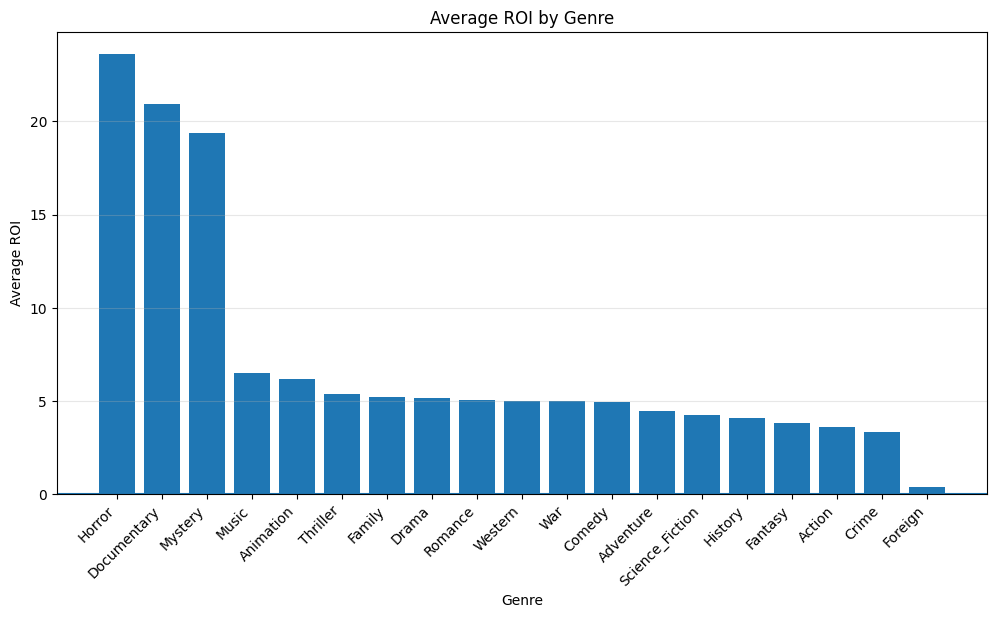

In [43]:
plt.figure(figsize=(12, 6))

plt.bar(
    roi_by_genre_df["genre"],
    roi_by_genre_df["ROI_mean"]
)

plt.xlabel("Genre")
plt.ylabel("Average ROI")
plt.title("Average ROI by Genre")
plt.xticks(rotation=45, ha="right")
plt.axhline(0)
plt.grid(axis="y", alpha=0.3)

plt.show()


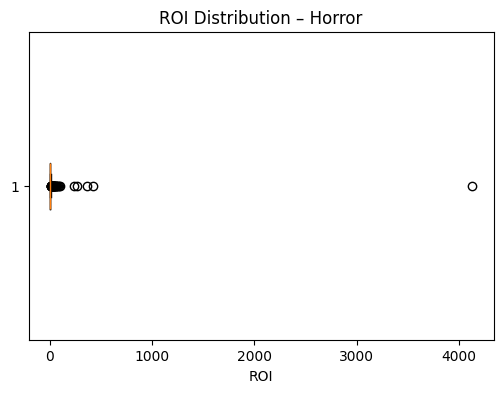

In [44]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    movies_credits_df.loc[movies_credits_df["genre_Horror"] == 1, "ROI"],
    vert=False
)
plt.title("ROI Distribution – Horror")
plt.xlabel("ROI")
plt.show()



In [45]:
movies_credits_df.loc[
    movies_credits_df["genre_Horror"] == 1,
    ["movie_id", "title", "ROI"]
].sort_values(
    by="ROI",
    ascending=False
).head(5)

,movie_id,title,ROI
3116,2667,The Blair Witch Project,4133.333333
3169,299245,The Gallows,426.644100
2515,30497,The Texas Chain Saw Massacre,363.047059
2818,10331,Night of the Living Dead,263.157895
2046,948,Halloween,233.333333


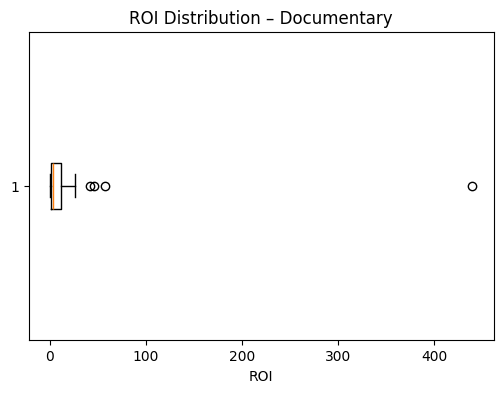

In [46]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    movies_credits_df.loc[movies_credits_df["genre_Documentary"] == 1, "ROI"],
    vert=False
)
plt.title("ROI Distribution – Documentary")
plt.xlabel("ROI")
plt.show()


In [47]:
movies_credits_df.loc[
    movies_credits_df["genre_Documentary"] == 1,
    ["movie_id", "title", "ROI"]
].sort_values(
    by="ROI",
    ascending=False
).head(3)

,movie_id,title,ROI
3171,9372,Super Size Me,439.616585
3117,9459,Woodstock,57.508517
3083,1781,An Inconvenient Truth,46.243000


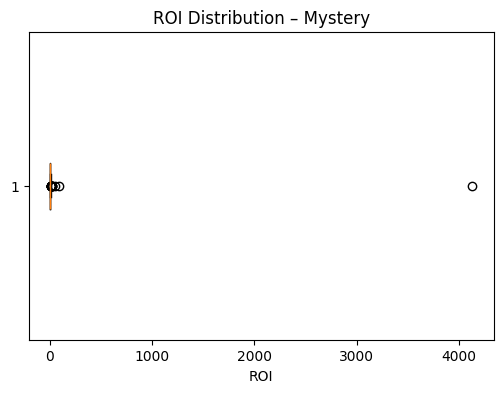

In [48]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    movies_credits_df.loc[movies_credits_df["genre_Mystery"] == 1, "ROI"],
    vert=False
)
plt.title("ROI Distribution – Mystery")
plt.xlabel("ROI")
plt.show()


In [49]:
movies_credits_df.loc[
    movies_credits_df["genre_Mystery"] == 1,
    ["movie_id", "title", "ROI"]
].sort_values(
    by="ROI",
    ascending=False
).head(5)

,movie_id,title,ROI
3116,2667,The Blair Witch Project,4133.333333
3056,176,Saw,86.593058
3170,473,Pi,53.685867
2898,82507,Sinister,25.904146
1767,251,Ghost,22.954545


In [50]:
genre_cols = [col for col in movies_credits_df.columns if col.startswith("genre_")]

excluded_titles = [
    "The Blair Witch Project",
    "Super Size Me"
]

roi_by_genre = []

for genre in genre_cols:
    genre_name = genre.replace("genre_", "")

    roi_mean = movies_credits_df.loc[
        (movies_credits_df[genre] == 1) &
        (~movies_credits_df["title"].isin(excluded_titles)),
        "ROI"
    ].mean()

    roi_by_genre.append({
        "genre": genre_name,
        "ROI_medio": roi_mean
    })

roi_by_genre_df = pd.DataFrame(roi_by_genre).sort_values(
    by="ROI_medio",
    ascending=False
)

roi_by_genre_df

,genre,ROI_medio
11,Horror,10.818901
5,Documentary,8.973497
12,Music,6.493791
2,Animation,6.162572
16,Thriller,5.379100
7,Family,5.190343
14,Romance,5.042605
18,Western,4.989209
17,War,4.972079
6,Drama,4.863106


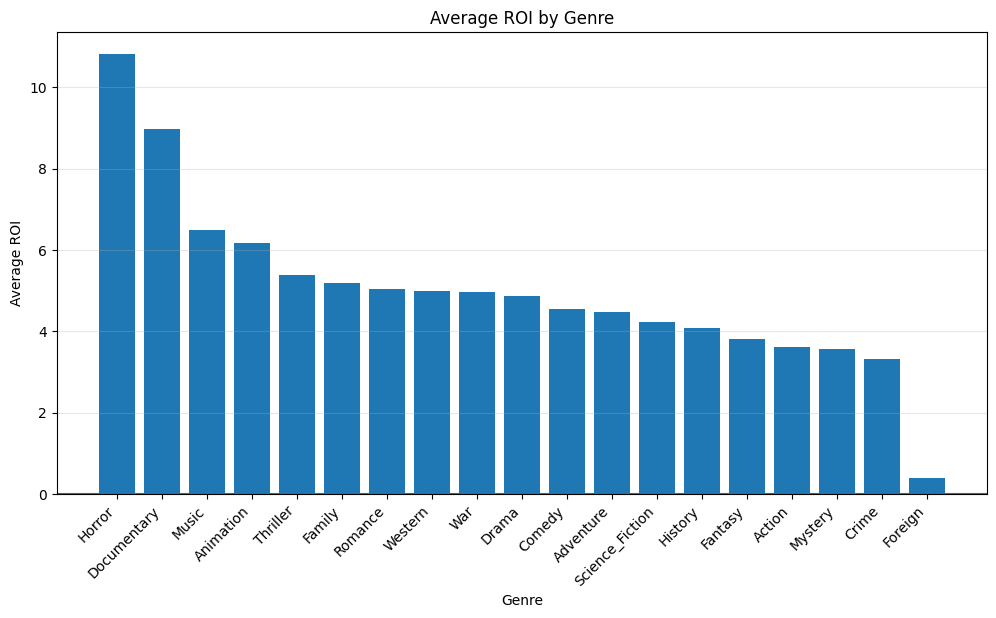

In [51]:
plt.figure(figsize=(12, 6))

plt.bar(
    roi_by_genre_df["genre"],
    roi_by_genre_df["ROI_medio"]
)

plt.xlabel("Genre")
plt.ylabel("Average ROI")
plt.title("Average ROI by Genre")
plt.xticks(rotation=45, ha="right")
plt.axhline(0)
plt.grid(axis="y", alpha=0.3)

plt.show()


2- Relación entre budget, revenue, popularidad y rating



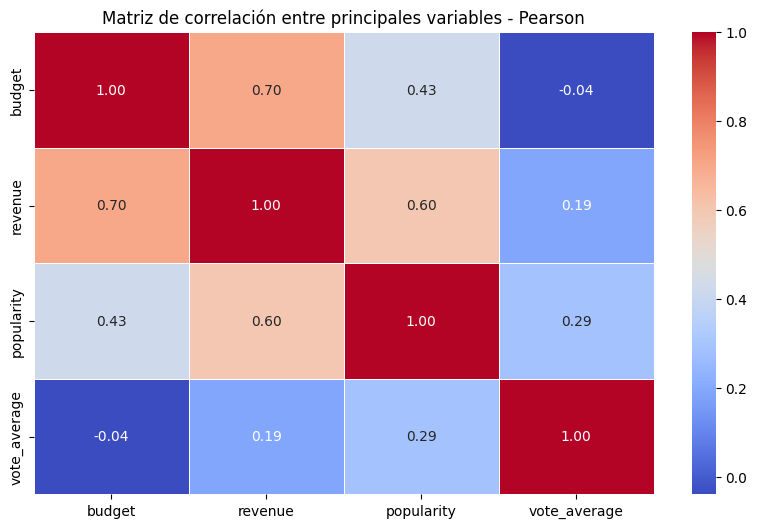

In [52]:
#Definimos las variables que vamos a relacionar
corr_cols = [
    "budget",
    "revenue",
    "popularity",
    "vote_average",
]
df_corr = final_movies_credits_df[corr_cols].copy()
corr_matrix = df_corr.corr(method="pearson")

#Creamos una matriz de correlacion en bsae al metodo pearson
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
    fmt=".2f"
)
plt.title("Matriz de correlación entre principales variables - Pearson")
plt.show()


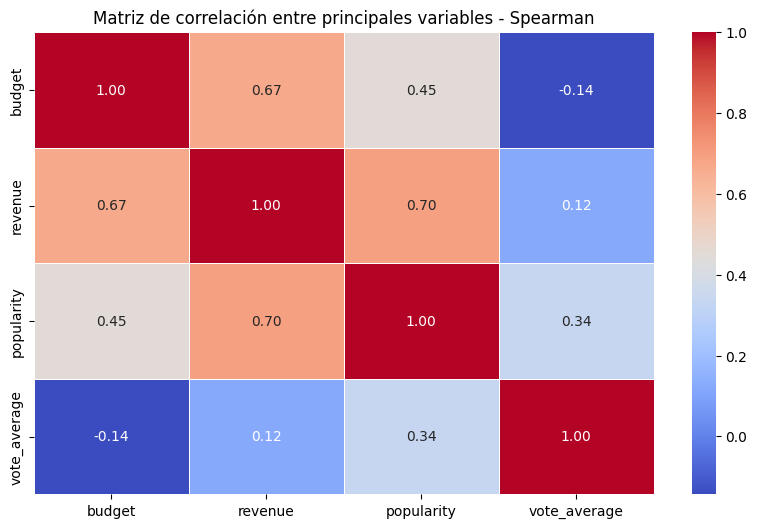

In [53]:
#Definimos las variables que vamos a
corr_cols = [
    "budget",
    "revenue",
    "popularity",
    "vote_average",
]
df_corr = final_movies_credits_df[corr_cols].copy()
corr_matrix = df_corr.corr(method="spearman")

#Creamos una matriz de correlacion en bsae al metodo spearman

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
    fmt=".2f"
)
plt.title("Matriz de correlación entre principales variables - Spearman")
plt.show()


3. Cual fue la evolución de la duración de películas en los últimos 50 años.

/tmp/ipython-input-3141575332.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


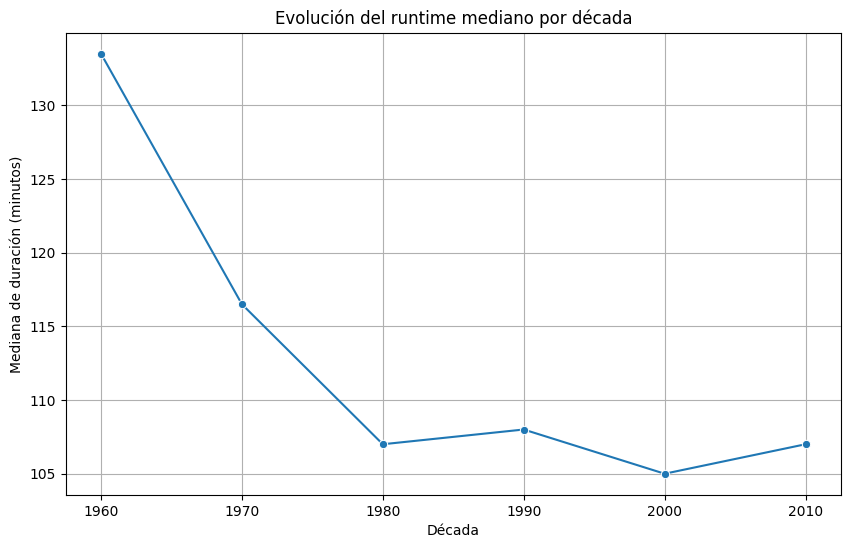

In [54]:
df = final_movies_credits_df.copy()
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year
df["decade"] = (df["year"] // 10) * 10

df_50 = df[df["year"] >= (df["year"].max() - 56)]

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_50,
    x="decade",
    y="runtime",
    estimator="median",
    ci=None,
    marker="o"
)

plt.title("Evolución del runtime mediano por década")
plt.xlabel("Década")
plt.ylabel("Mediana de duración (minutos)")
plt.grid(True)
plt.show()

In [55]:
df_50["decade"].value_counts().sort_index()


,count
decade,
1960,58
1970,78
1980,204
1990,529
2000,1315
2010,930


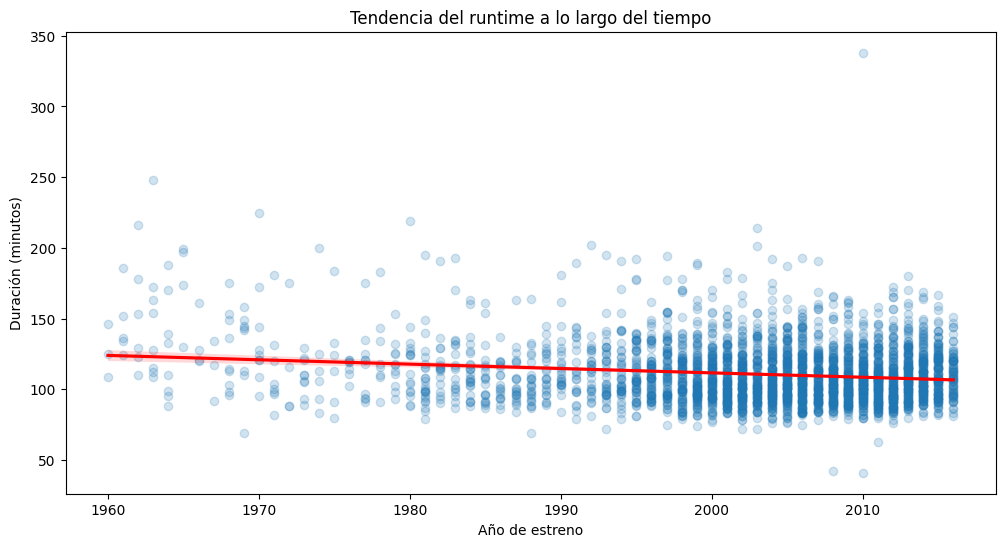

In [56]:
plt.figure(figsize=(12,6))
sns.regplot(
    data=df_50,
    x="year",
    y="runtime",
    scatter_kws={"alpha":0.2},
    line_kws={"color": "red"}
)
plt.title("Tendencia del runtime a lo largo del tiempo")
plt.xlabel("Año de estreno")
plt.ylabel("Duración (minutos)")
plt.show()


/tmp/ipython-input-570823903.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


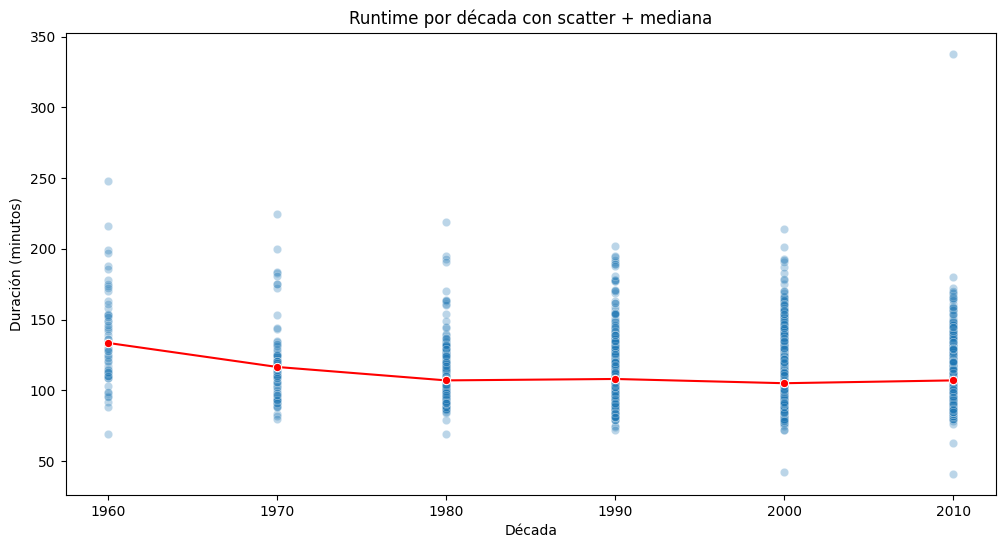

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_50,
    x="decade",
    y="runtime",
    alpha=0.3
)
sns.lineplot(
    data=df_50,
    x="decade",
    y="runtime",
    estimator="median",
    ci=None,
    marker="o",
    color="red"
)
plt.title("Runtime por década con scatter + mediana")
plt.xlabel("Década")
plt.ylabel("Duración (minutos)")
plt.show()


4. Directores con mejor rating promedio.
Filtrar por cantidad mínima de películas y analizar promedios.

In [58]:
director_counts = movies_credits_df["director"].value_counts()
director_counts


,count
director,
Steven Spielberg,27
Clint Eastwood,19
Ridley Scott,16
Robert Rodriguez,16
Martin Scorsese,16
...,...
Mike Cahill,1
Majid Majidi,1
David Evans,1


In [59]:
director_counts = director_counts[director_counts >= 10]

director_counts

,count
director,
Steven Spielberg,27
Clint Eastwood,19
Ridley Scott,16
Robert Rodriguez,16
Martin Scorsese,16
Renny Harlin,14
Steven Soderbergh,14
Tim Burton,14
Robert Zemeckis,13


In [60]:
director_vote_avg_df = (
    movies_credits_df
        .groupby("director")
        .agg(
            avg_vote_average=("vote_average", "mean"),
            movie_count=("movie_id", "count")
        )
        .reset_index()
        .query("movie_count >= 10")
        .sort_values("avg_vote_average", ascending=False)
        .reset_index(drop=True)
)

director_vote_avg_df

,director,avg_vote_average,movie_count
0,Martin Scorsese,7.381250,16
1,David Fincher,7.340000,10
2,Francis Ford Coppola,7.250000,10
3,Richard Linklater,7.010000,10
4,Steven Spielberg,6.974074,27
5,Robert Zemeckis,6.915385,13
6,Woody Allen,6.883333,12
7,Clint Eastwood,6.857895,19
8,Rob Reiner,6.730000,10
9,Tim Burton,6.728571,14


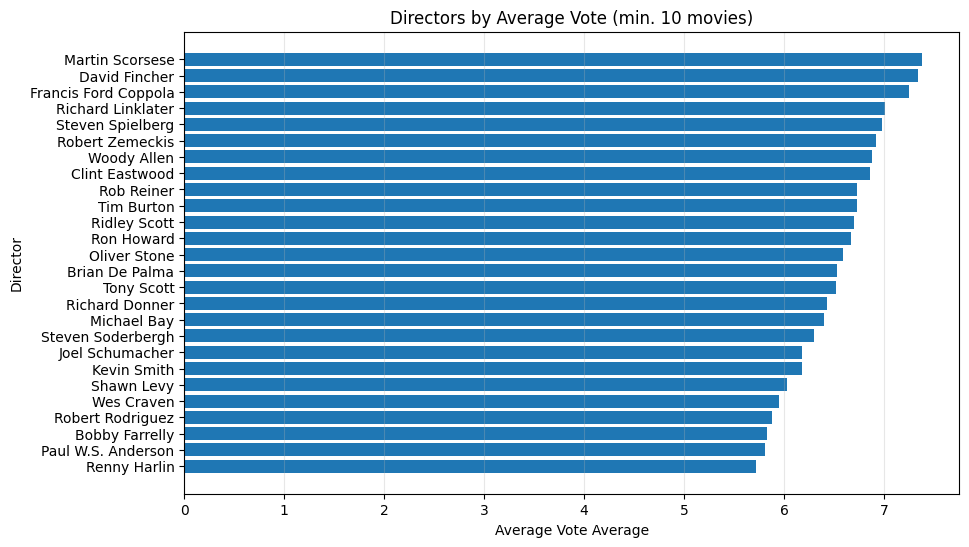

In [61]:
top_directors = director_vote_avg_df

plt.figure(figsize=(10, 6))

plt.barh(
    director_vote_avg_df["director"],
    director_vote_avg_df["avg_vote_average"]
)

plt.xlabel("Average Vote Average")
plt.ylabel("Director")
plt.title("Directors by Average Vote (min. 10 movies)")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)

plt.show()


In [62]:
os.makedirs("data", exist_ok=True)
director_vote_avg_df.to_json(
    "data/top_directores.json",
    orient="records",
    indent=2
)


In [63]:
os.makedirs("data", exist_ok=True)
roi_by_genre_df.to_json(
    "data/roi_por_genero.json",
    orient="records",
    indent=2
)
